# Dataset Compiling processing  
- [x] Extract labels & other info from dataset folder or file name
- [x] optional rename file name and put under one folder
- [x] capture audio duration (original and trimmed) of signal and save it in master data file

## Part 1 Setup and utility functions

In [1]:
import os
import pandas as pd
import librosa

In [2]:
def get_duration(file_path):
    try:
        y, sr = librosa.load(file_path)
        duration_seconds = librosa.get_duration(y=y, sr=sr)
        yt, index = librosa.effects.trim(y,top_db=60)
        duration_seconds_trim = librosa.get_duration(y=yt, sr=sr)
        return round(duration_seconds,2), round(duration_seconds_trim,2)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0
print("test 01:", get_duration("./dataset//CREMA-D/1001_DFA_ANG_XX.wav"))
print("test 02:", get_duration("./dataset/RAVDESS/Actor_08/03-01-04-02-02-02-08.wav"))

test 01: (2.28, 2.28)
test 02: (3.7, 3.7)


In [3]:
# Dictionary to map emotional categories to sentiment values
sentiment_mapping = {
    "Anger": -1,
    "Angry": -1,
    "Disgust": -1,
    "Fear": -1,
    "Fearful": -1,
    "Happy": 1,
    "Happiness": 1,
    "Surprised": 1,
    "Surprise": 1,
    "Neutral": 0,
    "Neutrality": 0,
    "Calm": 0,
    "Calmness": 0,
    "Sad": -1,
    "Sadness": -1
}

# Function to map emotional category to sentiment value
def map_to_sentiment(emotional_category):
    return sentiment_mapping.get(emotional_category, 0)

# List to store file information
file_info_list = []

In [4]:
dataset_name = "CREMA-D"
dataset_folder = f"./dataset/{dataset_name}/"

gender_info_cremad = pd.read_excel('./info-record.xlsx',sheet_name="DB Name Mapping",header=30, usecols="B:C")
gender_mapping_cremad = gender_info_cremad.set_index('CREMA-D').to_dict()['F/M']

"""file_name sample:  ./CREMA-D/1001_DFA_ANG_XX.wav """
# Dictionary to map emotional categories based on file names
emotional_mapping_cremad = {
    "ANG": "Anger",
    "DIS": "Disgust",
    "FEA": "Fear",
    "HAP": "Happiness",
    "NEU": "Neutrality",
    "SAD": "Sadness"
}
# Function to extract emotional category from file name
def get_emotional_category_cremad(file_name):
    for key, value in emotional_mapping_cremad.items():
        if key in file_name:
            return value
    return "Unknown"


# Traverse the dataset folder
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            emotional_category = get_emotional_category_cremad(file)
            sentiment_value = map_to_sentiment(emotional_category)
            speaker_id = file[:4]
            gender = gender_mapping_cremad.get(int(file[:4]))
            duration, duration_trimmed = get_duration(file_path)
            
            # Append file information to the list
            file_info_list.append({
                "dataset_name": dataset_name,
                "file_path": file_path,
                "sentiment_value": sentiment_value,
                "emotional_category": emotional_category,
                "speaker_id": speaker_id,
                "gender": "Female" if gender=="F" else "Male",
                "duration": duration,
                "duration_trimmed": duration_trimmed,
            })

df = pd.DataFrame(file_info_list)
# df.to_csv(f"./table_{dataset_name}.csv", index=False)
df.tail(10)

,dataset_name,file_path,sentiment_value,emotional_category,speaker_id,gender,duration,duration_trimmed
7432,CREMA-D,./dataset/CREMA-D/1067_IWW_NEU_XX.wav,0,Neutrality,1067,Male,2.60,2.60
7433,CREMA-D,./dataset/CREMA-D/1078_ITH_FEA_XX.wav,-1,Fear,1078,Female,2.70,2.70
7434,CREMA-D,./dataset/CREMA-D/1072_IWW_NEU_XX.wav,0,Neutrality,1072,Female,2.40,2.40
7435,CREMA-D,./dataset/CREMA-D/1059_ITH_HAP_XX.wav,1,Happiness,1059,Male,2.70,2.70
7436,CREMA-D,./dataset/CREMA-D/1068_DFA_DIS_XX.wav,-1,Disgust,1068,Male,1.80,1.80
7437,CREMA-D,./dataset/CREMA-D/1089_WSI_ANG_XX.wav,-1,Anger,1089,Female,2.27,2.27
7438,CREMA-D,./dataset/CREMA-D/1025_IWW_ANG_XX.wav,-1,Anger,1025,Female,2.00,2.00
7439,CREMA-D,./dataset/CREMA-D/1030_IWW_ANG_XX.wav,-1,Anger,1030,Female,2.37,2.37
7440,CREMA-D,./dataset/CREMA-D/1019_TIE_ANG_XX.wav,-1,Anger,1019,Male,3.30,3.30
7441,CREMA-D,./dataset/CREMA-D/1079_IEO_NEU_XX.wav,0,Neutrality,1079,Female,2.07,2.07


## Step 2 extend to other dataset RAVDESS, SAVEE, TESS

In [5]:
dataset_name = "RAVDESS"
dataset_folder = f"./dataset/{dataset_name}/"
"""file_name sample:  ./RAVDESS/actor01/03-01-01-01-01-01-01.wav """
# Dictionary to map emotional categories based on file names
emotion_mapping_ravdess = {
    "01": "Neutrality",
    "02": "Calmness",
    "03": "Happiness",
    "04": "Sadness",
    "05": "Anger",
    "06": "Fear",
    "07": "Disgust",
    "08": "Surprise"
}
# Dictionary to map emotional intensity
intensity_mapping_ravdess = {
    "01": "Normal",
    "02": "Strong"
}


# Function to extract emotional category from RAVDESS file name
def get_emotional_category_ravdess(file_name):
    parts = file_name.split('-')
    emotion_code = parts[2]
    emotional_category = emotion_mapping_ravdess.get(emotion_code, "Unknown")
    return emotional_category

# Function to extract emotional intensity from RAVDESS file name
def get_emotional_intensity_ravdess(file_name):
    parts = file_name.split('-')
    intensity_code = parts[3]
    emotional_intensity = intensity_mapping_ravdess.get(intensity_code, "Unknown")
    return emotional_intensity

def get_gender_ravdess(file_name):
    parts = file_name.split('-')
    gender_code = int(parts[6][:2]) % 2 
    return "Female" if gender_code == 0 else "Male"

# file_info_list = []

for _, dirs, _ in os.walk(dataset_folder):
    for sub_dir in dirs:
        for root, _, files in os.walk(os.path.join(dataset_folder,sub_dir)):
            for file in files:
                if file.endswith('.wav'):
                    file_path = os.path.join(root, file)
                    emotional_category = get_emotional_category_ravdess(file)
                    emotional_intensity = get_emotional_intensity_ravdess(file)
                    speaker_id = file[-6:-4]
                    sentiment_value = map_to_sentiment(emotional_category)
                    gender_category = get_gender_ravdess(file)
                    duration, duration_trimmed = get_duration(file_path)
                    
                    # Append file information to the list
                    file_info_list.append({
                        "dataset_name": dataset_name,
                        "file_path": file_path,
                        "emotional_category": emotional_category,
                       #"emotional_intensity": emotional_intensity,
                        "speaker_id": speaker_id,
                        "sentiment_value": sentiment_value,
                        "gender": gender_category,
                        "duration": duration,
                        "duration_trimmed": duration_trimmed,
                    })

df = pd.DataFrame(file_info_list)
df.tail(10)

,dataset_name,file_path,sentiment_value,emotional_category,speaker_id,gender,duration,duration_trimmed
8872,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-06-02-01-02-0...,-1,Fear,08,Female,3.90,2.88
8873,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-04-01-01-02-0...,-1,Sadness,08,Female,3.87,3.87
8874,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-07-01-01-01-0...,-1,Disgust,08,Female,3.90,3.90
8875,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-07-02-02-01-0...,-1,Disgust,08,Female,3.74,3.74
8876,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-04-02-02-02-0...,-1,Sadness,08,Female,3.70,3.70
8877,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-03-02-02-02-0...,1,Happiness,08,Female,3.94,3.94
8878,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-03-01-01-02-0...,1,Happiness,08,Female,3.44,3.44
8879,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-02-02-01-01-0...,0,Calmness,08,Female,3.64,3.64
8880,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-02-01-02-01-0...,0,Calmness,08,Female,3.47,3.47
8881,RAVDESS,./dataset/RAVDESS/Actor_08/03-01-01-01-02-02-0...,0,Neutrality,08,Female,3.50,3.50


In [6]:
dataset_name = "SAVEE"
dataset_folder = f"./dataset/{dataset_name}/"

"""file_name sample:  ./SAVEE/DC_sa01.wav """
# Dictionary to map emotional categories based on file names
emotional_mapping_SAVEE = {
    "a": "Anger",
    "d": "Disgust",
    "f": "Fear",
    "h": "Happiness",
    "sa": "Sadness",
    "su": "Surprise",
    "n": "Neutrality"
}
# a: anger, d: disgust,f:  fear, h: happiness, sa: sadness, su: surprise, n: neutra

# file_info_list = []
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            emotional_category = emotional_mapping_SAVEE.get(file[3:-6], "Unknown")
            sentiment_value = map_to_sentiment(emotional_category)
            duration, duration_trimmed = get_duration(file_path)
            
            # Append file information to the list
            file_info_list.append({
                "dataset_name": dataset_name,
                "file_path": file_path,
                "emotional_category": emotional_category,
                "speaker_id": file[:2],
                "sentiment_value": sentiment_value,
                "gender": "Male",
                "duration": duration,
                "duration_trimmed": duration_trimmed,
            })

df = pd.DataFrame(file_info_list)
df.tail(10)

,dataset_name,file_path,sentiment_value,emotional_category,speaker_id,gender,duration,duration_trimmed
9352,SAVEE,./dataset/SAVEE/JE_sa11.wav,-1,Sadness,JE,Male,5.93,5.93
9353,SAVEE,./dataset/SAVEE/JE_sa05.wav,-1,Sadness,JE,Male,4.83,4.83
9354,SAVEE,./dataset/SAVEE/DC_d01.wav,-1,Disgust,DC,Male,4.36,4.36
9355,SAVEE,./dataset/SAVEE/JK_n11.wav,0,Neutrality,JK,Male,5.69,5.69
9356,SAVEE,./dataset/SAVEE/JK_n05.wav,0,Neutrality,JK,Male,3.35,3.35
9357,SAVEE,./dataset/SAVEE/JE_a01.wav,-1,Anger,JE,Male,3.56,3.56
9358,SAVEE,./dataset/SAVEE/JE_a15.wav,-1,Anger,JE,Male,6.11,6.11
9359,SAVEE,./dataset/SAVEE/DC_n22.wav,0,Neutrality,DC,Male,3.05,3.05
9360,SAVEE,./dataset/SAVEE/DC_su04.wav,1,Surprise,DC,Male,3.35,3.35
9361,SAVEE,./dataset/SAVEE/DC_su10.wav,1,Surprise,DC,Male,4.06,4.06


In [7]:
dataset_name = "TESS"
dataset_folder = f"./dataset/{dataset_name}/"

"""file_name sample:  ./TESS/OAF_Fear/OAF_back_fear.wav """
# Dictionary to map emotional categories based on file names
emotional_mapping_TESS = {
    "angry": "Anger",
    "disgust": "Disgust",
    "fear": "Fear",
    "happy": "Happiness",
    "sad": "Sadness",
    "ps": "Surprise",
    "neutral": "Neutrality"
}

for _, dirs, _ in os.walk(dataset_folder):
    for sub_dir in dirs:
        for root, _, files in os.walk(os.path.join(dataset_folder,sub_dir)):
            for file in files:
                if file.endswith('.wav'):
                    file_path = os.path.join(root, file)
                    parts = file.split('_')
                    emotional_category = emotional_mapping_TESS.get(parts[-1][:-4], "Unknown")
                    speaker_id = file[:3]
                    sentiment_value = map_to_sentiment(emotional_category)
                    duration, duration_trimmed = get_duration(file_path)
                    file_info_list.append({
                        "dataset_name": dataset_name,
                        "file_path": file_path,
                        "emotional_category": emotional_category,
                        "speaker_id": speaker_id,
                        "sentiment_value": sentiment_value,
                        "speaker_id": speaker_id,
                        "gender": "Female",
                        "duration": duration,
                        "duration_trimmed": duration_trimmed,
                    })


df = pd.DataFrame(file_info_list)
df.tail(10) 

,dataset_name,file_path,sentiment_value,emotional_category,speaker_id,gender,duration,duration_trimmed
12152,TESS,./dataset/TESS/OAF_Sad/OAF_shack_sad.wav,-1,Sadness,OAF,Female,2.49,2.49
12153,TESS,./dataset/TESS/OAF_Sad/OAF_lean_sad.wav,-1,Sadness,OAF,Female,2.47,2.47
12154,TESS,./dataset/TESS/OAF_Sad/OAF_join_sad.wav,-1,Sadness,OAF,Female,2.50,2.50
12155,TESS,./dataset/TESS/OAF_Sad/OAF_rough_sad.wav,-1,Sadness,OAF,Female,2.39,2.39
12156,TESS,./dataset/TESS/OAF_Sad/OAF_fail_sad.wav,-1,Sadness,OAF,Female,2.75,2.75
12157,TESS,./dataset/TESS/OAF_Sad/OAF_tool_sad.wav,-1,Sadness,OAF,Female,2.56,2.56
12158,TESS,./dataset/TESS/OAF_Sad/OAF_goose_sad.wav,-1,Sadness,OAF,Female,2.52,2.52
12159,TESS,./dataset/TESS/OAF_Sad/OAF_met_sad.wav,-1,Sadness,OAF,Female,2.44,2.44
12160,TESS,./dataset/TESS/OAF_Sad/OAF_pearl_sad.wav,-1,Sadness,OAF,Female,2.40,2.40
12161,TESS,./dataset/TESS/OAF_Sad/OAF_rain_sad.wav,-1,Sadness,OAF,Female,2.26,2.26


In [8]:
df.describe()

,sentiment_value,duration,duration_trimmed
count,12162.000000,12162.000000,12162.000000
mean,-0.420737,2.619248,2.540623
std,0.816837,0.716345,0.656102
min,-1.000000,1.250000,1.250000
25%,-1.000000,2.100000,2.090000
50%,-1.000000,2.470000,2.440000
75%,0.000000,3.000000,2.870000
max,1.000000,7.140000,7.140000


In [9]:
df.to_csv(f"./dataset_info_combined_v4.csv", index=False)

## Step 3 check statistics

In [10]:
print("----check some statistics----")
print("average length of duration in different datasets: \n", df.groupby('dataset_name')['duration'].mean())
print("total length of duration in different datasets: \n", df.groupby('dataset_name')['duration'].sum())
print("total length of duration in different categories: \n", df.groupby('emotional_category')['duration'].sum())
print("total length of duration in different categories: \n", df.groupby('sentiment_value')['duration'].sum())

----check some statistics----
average length of duration in different datasets: 
 dataset_name
CREMA-D    2.543601
RAVDESS    3.700375
SAVEE      3.839292
TESS       2.055146
Name: duration, dtype: float64
total length of duration in different datasets: 
 dataset_name
CREMA-D    18929.48
RAVDESS     5328.54
SAVEE       1842.86
TESS        5754.41
Name: duration, dtype: float64
total length of duration in different categories: 
 emotional_category
Anger         4988.30
Calmness       728.71
Disgust       5505.19
Fear          4768.54
Happiness     4693.73
Neutrality    4234.03
Sadness       5235.92
Surprise      1700.87
Name: duration, dtype: float64
total length of duration in different categories: 
 sentiment_value
-1    20497.95
 0     4962.74
 1     6394.60
Name: duration, dtype: float64


In [11]:
df[df.duration > df.duration_trimmed].groupby('dataset_name').count()

,file_path,sentiment_value,emotional_category,speaker_id,gender,duration,duration_trimmed
dataset_name,,,,,,,
CREMA-D,1,1,1,1,1,1,1
RAVDESS,1047,1047,1047,1047,1047,1047,1047


In [12]:
df = pd.read_csv(f"./dataset_info_combined_V4.csv")

## Visualization

/var/folders/jv/1vv6tgys3bzf7drmcnhh7q2m0000gn/T/ipykernel_66952/940157511.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


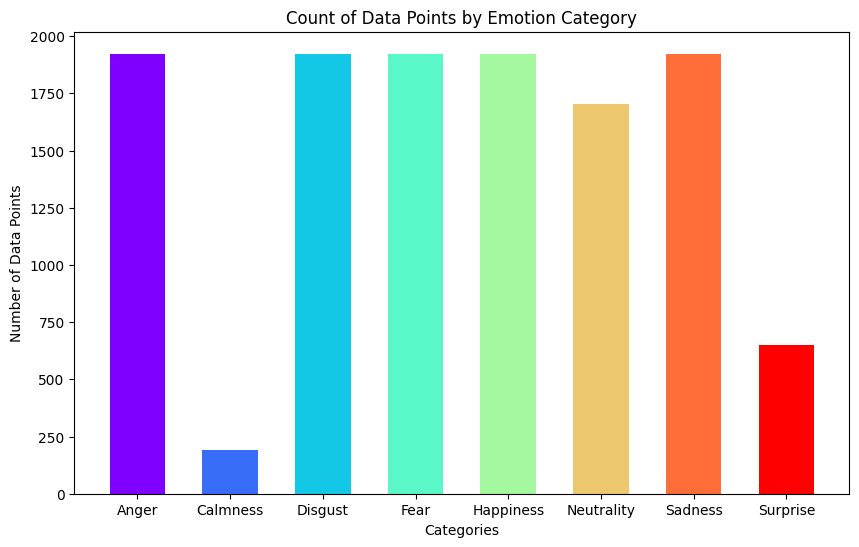

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart_on_category_counts(df_category_counts,ylabel_desc, title):
    cmap = plt.cm.get_cmap('rainbow') 
    num_categories = len(df_category_counts)
    colors = cmap(np.linspace(0, 1, num_categories))
    plt.figure(figsize=(10, 6))
    plt.bar(df_category_counts.index, df_category_counts.values, color=colors,width=0.6)
    plt.xlabel('Categories')
    plt.ylabel(ylabel_desc)
    plt.title(title)
    plt.show()

df_category_counts = df.groupby('emotional_category')['duration'].count()#.value_counts()
plot_bar_chart_on_category_counts(df_category_counts,'Number of Data Points', 'Count of Data Points by Emotion Category')

/var/folders/jv/1vv6tgys3bzf7drmcnhh7q2m0000gn/T/ipykernel_66952/940157511.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


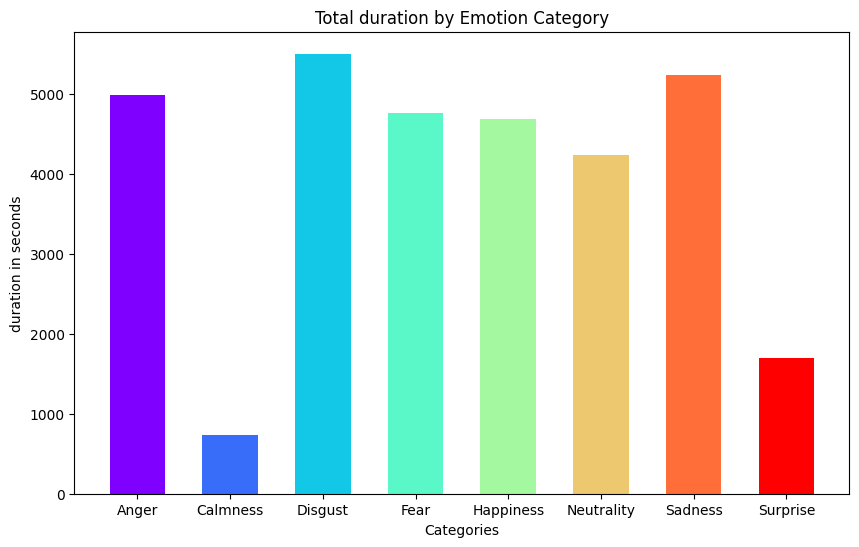

In [14]:
df_category_counts = df.groupby('emotional_category')['duration'].sum()
plot_bar_chart_on_category_counts(df_category_counts, 'duration in seconds' ,'Total duration by Emotion Category')

/var/folders/jv/1vv6tgys3bzf7drmcnhh7q2m0000gn/T/ipykernel_66952/940157511.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


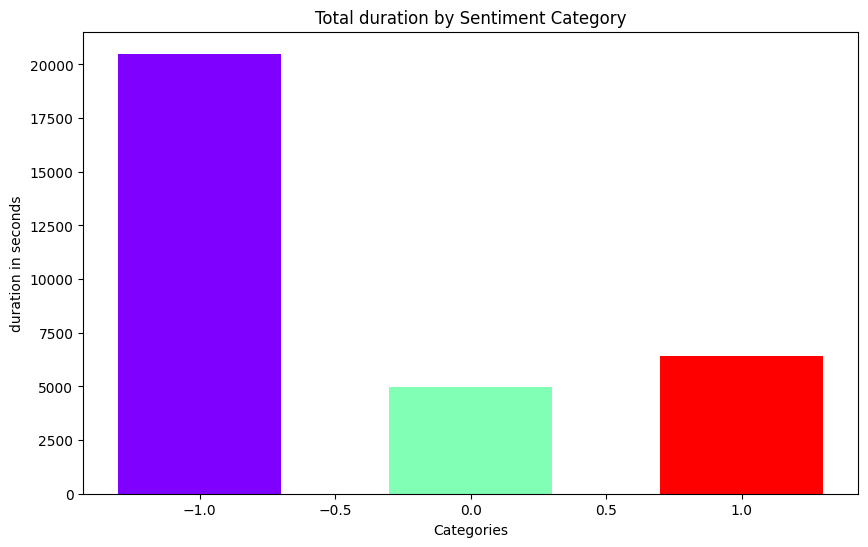

In [15]:
df_category_counts = df.groupby('sentiment_value')['duration'].sum()
plot_bar_chart_on_category_counts(df_category_counts, 'duration in seconds' ,'Total duration by Sentiment Category')

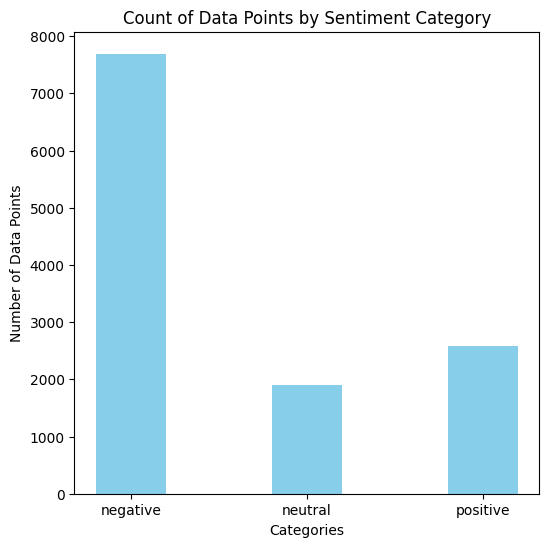

In [16]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df and the column with categories is 'category'
df_category_counts = df['sentiment_value'].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(df_category_counts.index, df_category_counts.values, color='skyblue',width=0.4)
plt.xlabel('Categories')
plt.ylabel('Number of Data Points')
plt.title('Count of Data Points by Sentiment Category')

plt.xticks([-1,0,1],['negative', 'neutral', 'positive'])
plt.show()